# 14_April

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#handle missing data

df=pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(303, 14)

Step 2 : Check Missing Values in Dataset


In [7]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Step 3 : Dataset Description


In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df.nunique().sort_values()

sex           2
fbs           2
exang         2
target        2
restecg       3
slope         3
cp            4
thal          4
ca            5
oldpeak      40
age          41
trestbps     49
thalach      91
chol        152
dtype: int64

Step 4 : Seperating X and Y variables


In [10]:
X = df.drop(labels=['target'],axis=1)
Y = df[['target']]
Y.value_counts()

target
1         165
0         138
Name: count, dtype: int64

Question 2 : Split the dataset into a training set (70%) and a test set (30%).

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

In [12]:
xtrain.shape

(212, 13)

In [15]:
xtest.shape


(91, 13)

Question 3 : Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(xtrain,ytrain.values.flatten())

RandomForestClassifier(max_depth=10)

Question 4 : Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score

In [17]:
# Creating a function to evaluate model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(x,y,model):
    ypred = model.predict(x)
    acc = accuracy_score(y,ypred)
    pre = precision_score(y,ypred)
    rec = recall_score(y,ypred)
    f1 = f1_score(y,ypred)
    print(f'Accuracy Score  : {acc:.4f}')
    print(f'Precision Score : {pre:.4f}')
    print(f'Recall Score    : {rec:.4f}')
    print(f'F1 Score        : {f1:.4f}')
    return acc, pre, rec, f1

In [18]:
# Evaluate model on test data
acc_base, pre_base, rec_base, f1_base = evaluate_model(xtest, ytest, rfc)


Accuracy Score  : 0.8132
Precision Score : 0.8235
Recall Score    : 0.8400
F1 Score        : 0.8317


In [19]:
from sklearn.metrics import classification_report
ypred_test = rfc.predict(xtest)
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



<Axes: >

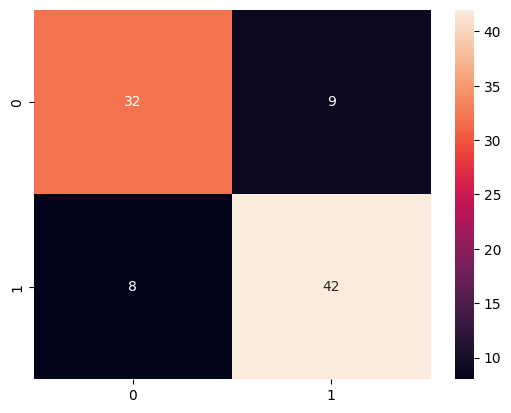

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest,ypred_test)
sns.heatmap(cf, annot=True, fmt='d')

Question 5 : Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [21]:
rfc.feature_importances_


array([0.08653285, 0.03216429, 0.11036496, 0.07160129, 0.07639842,
       0.01439477, 0.01596303, 0.11384539, 0.08752821, 0.10545652,
       0.05182747, 0.14082459, 0.09309822])

In [22]:
rfc.feature_names_in_


array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [ ]:
array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)


In [24]:
imp = pd.Series(rfc.feature_importances_)
imp.index = rfc.feature_names_in_
imp = imp.sort_values(ascending=False)
imp

ca          0.140825
thalach     0.113845
cp          0.110365
oldpeak     0.105457
thal        0.093098
exang       0.087528
age         0.086533
chol        0.076398
trestbps    0.071601
slope       0.051827
sex         0.032164
restecg     0.015963
fbs         0.014395
dtype: float64

In [25]:
top5 = list(imp[0:5].index)
print(f'Top 5 features in the data are : {top5}')

Top 5 features in the data are : ['ca', 'thalach', 'cp', 'oldpeak', 'thal']


<Axes: title={'center': 'Feature Importances Plot'}>

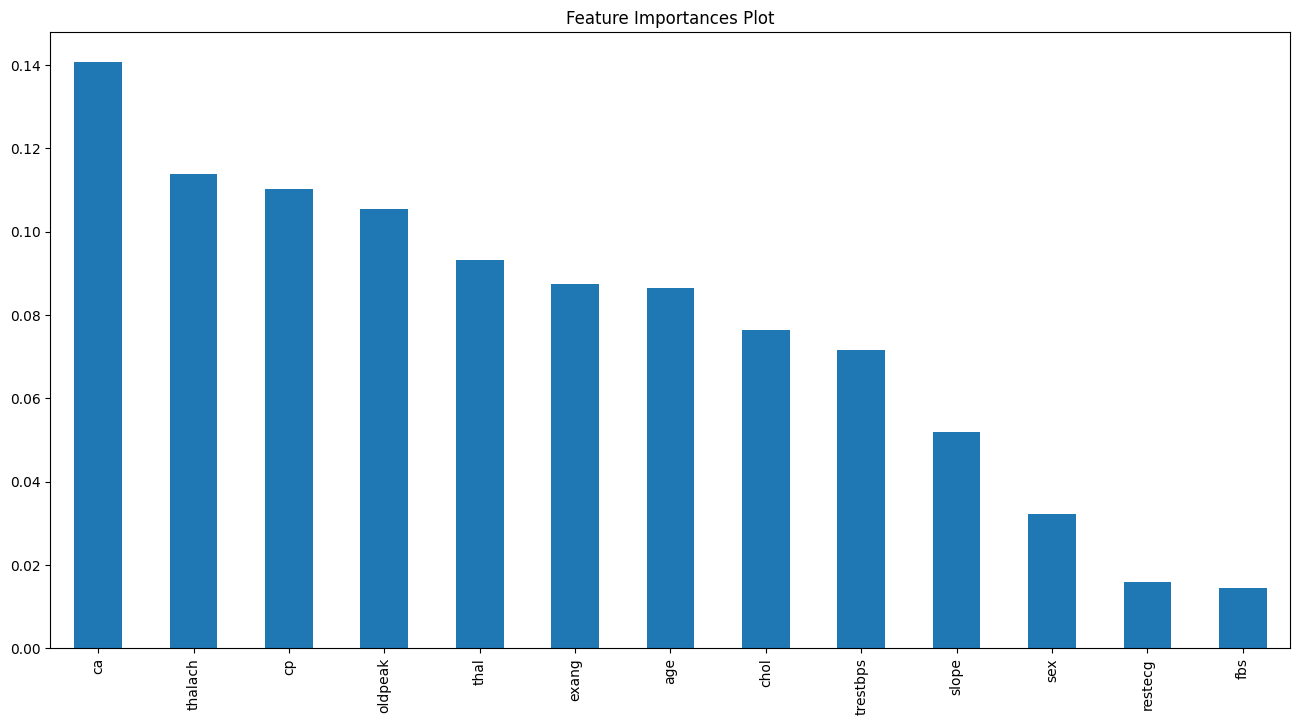

In [26]:
imp.plot(kind='bar',title='Feature Importances Plot', figsize=(16,8))


Question 6 : Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [27]:
# Defining the parameters for tuning
parameters = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}
# Performing Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=parameters,
                          cv=5, 
                          scoring='f1',
                          n_iter=50,
                          verbose=3)
rscv.fit(xtrain,ytrain.values.flatten())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.844 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.857 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.784 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.913 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.884 total time=   0.7s
[CV 2/5] END max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.880 total time=   0.7s
[CV 3/5] END max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.784 total time=   0.8s
[CV 4/5

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='f1', verbose=3)

In [29]:
rscv.best_score_

0.862556356157685

Question 7 : Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [30]:
# Best Parameters
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_depth': 7}

In [31]:
# Best Parameters
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_depth': 7}

In [32]:
# Best F1 Score
rscv.best_score_

0.862556356157685

In [33]:
# Testing Accuracy on tuned model
print('Results for Tuned Model :\n')
acc_tuned, pre_tuned , rec_tuned, f1_tuned = evaluate_model(xtest,ytest.values.flatten(),rscv)


Results for Tuned Model :

Accuracy Score  : 0.8132
Precision Score : 0.8235
Recall Score    : 0.8400
F1 Score        : 0.8317


In [35]:
dct = {
    'metrics':['accuracy','precision','recall','f1'],
    'base model':[acc_base,pre_base,rec_base,f1_base],
    'tuned model':[acc_tuned,pre_tuned,rec_tuned,f1_tuned]
}

In [36]:
df_compare = pd.DataFrame(dct)
df_compare

,metrics,base model,tuned model
0,accuracy,0.813187,0.813187
1,precision,0.823529,0.823529
2,recall,0.840000,0.840000
3,f1,0.831683,0.831683


Question 8 : Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [37]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=5)

In [38]:
imp_tuned = best_rfc.feature_importances_
imp_tuned = pd.Series(imp_tuned)
imp_tuned.index = best_rfc.feature_names_in_
imp_tuned = imp_tuned.sort_values(ascending=False)
imp_tuned

ca          0.182547
cp          0.140839
thal        0.137054
oldpeak     0.114419
exang       0.092741
thalach     0.086371
age         0.061859
slope       0.051936
trestbps    0.049820
chol        0.041180
sex         0.022837
restecg     0.012187
fbs         0.006210
dtype: float64

In [39]:
imp_tuned[0:2]


ca    0.182547
cp    0.140839
dtype: float64

<Axes: title={'center': 'Feature Importances for tuned model'}>

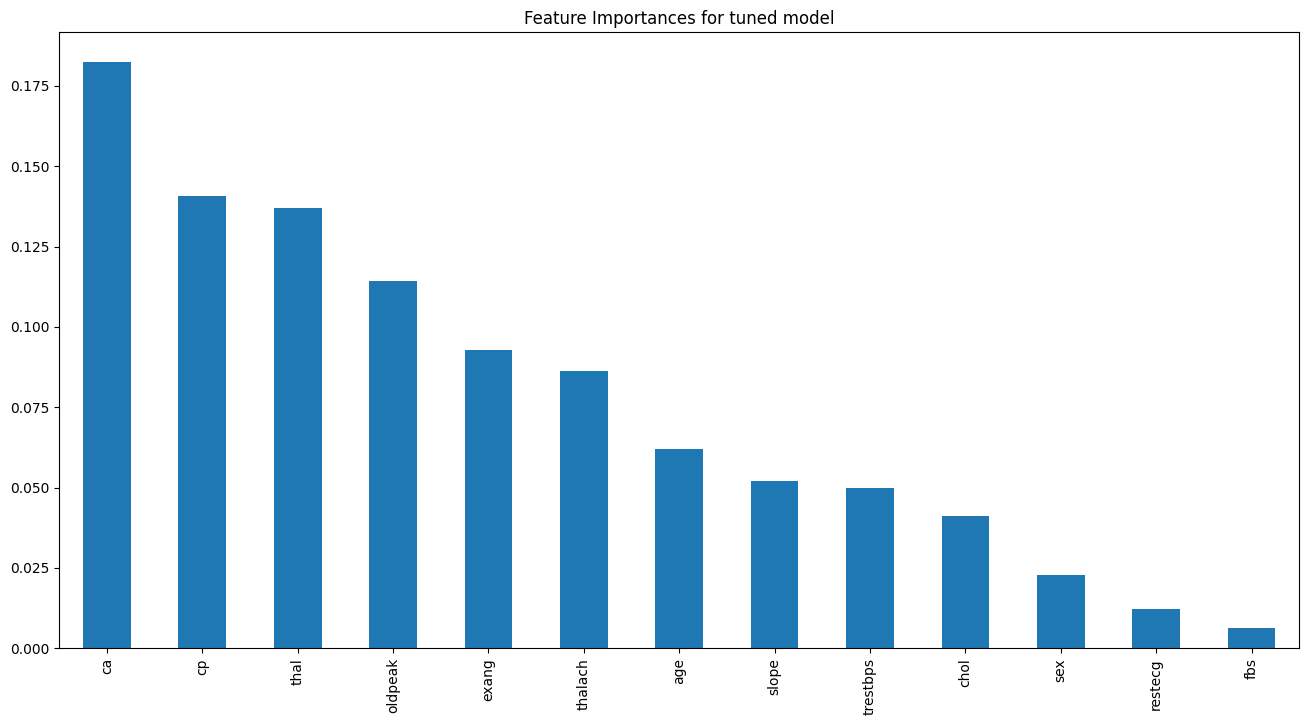

In [40]:
imp_tuned.plot(kind='bar',title='Feature Importances for tuned model',figsize=(16,8))


In [41]:
top2 = xtrain[['ca','cp']]
top2.head()

,ca,cp
124,0,2
72,0,1
15,0,2
10,0,0
163,4,2


In [42]:
df_top2 =pd.concat([top2,ytrain],axis=1)
df_top2.head()

,ca,cp,target
124,0,2,1
72,0,1,1
15,0,2,1
10,0,0,1
163,4,2,1


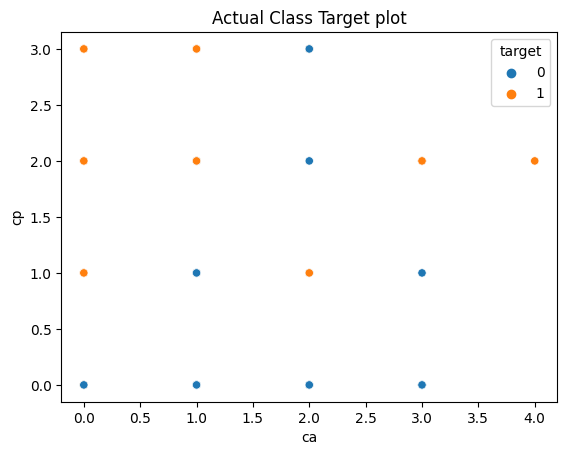

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='target')
plt.title('Actual Class Target plot')
plt.show()

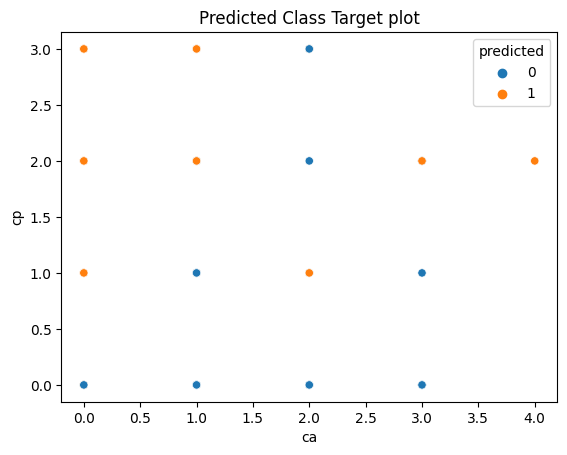

In [44]:
df_top2['predicted'] = best_rfc.predict(xtrain)
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='predicted')
plt.title('Predicted Class Target plot')
plt.show()